In [1]:
import pandas as pd
from loadAndPreprocess import load_and_preprocess
from pykrige.ok3d import OrdinaryKriging3D
import pickle

'''
well_info: Well, X, Y, Total Resources
sensor_data: Depth, Porosity, Hydrate Saturation, Estimated Resources
'''
well_info, sensor_data_list = load_and_preprocess()

# Remove the data point with NaN value
well_info = well_info.dropna()
for sensor_data in sensor_data_list:
    sensor_data.dropna(inplace=True)
    
    
def compose_krige3D(name: str, sample_frac: float, variogram: str):
    # Make kriging interpolation for Porosity  individually
    data_frames = []
    for i, df in enumerate(sensor_data_list):
        df['X'] = well_info.loc[i, 'X']
        df['Y'] = well_info.loc[i, 'Y']
        df['Well'] = well_info.loc[i, 'Well']
        df['Total Resources'] = well_info.loc[i, 'Total Resources']
        data_frames.append(df)
        
    combined_data = pd.concat(data_frames, ignore_index=True)
    sampled_data = combined_data.sample(frac=sample_frac, random_state=1)  # random_state for reproducibility

    X = sampled_data['X'].values
    Y = sampled_data['Y'].values
    Z = sampled_data['Depth'].values
    values = sampled_data[name].values

    # Create the 3D Kriging model
    ok3d = OrdinaryKriging3D(
        X,
        Y,
        Z,
        values,
        variogram_model=variogram,  # You might need to experiment with different models
        verbose=True,
        enable_plotting=True,
    )
    
    return ok3d


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'hole-effect' Variogram Model
Partial Sill: 0.0012084382568926166
Full Sill: 0.006891124882340032
Range: 1507.7406234905316
Nugget: 0.005682686625447415 



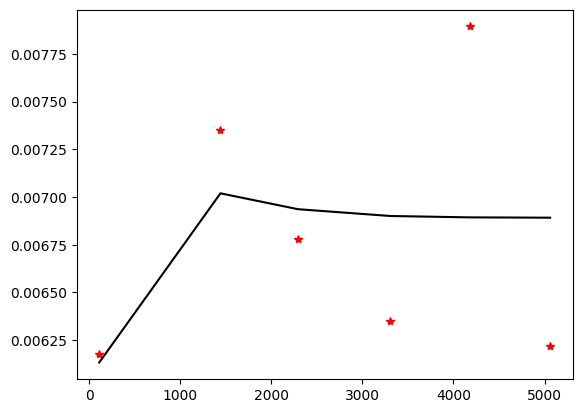

Calculating statistics on variogram model fit...


KeyboardInterrupt: 

In [2]:

ok3d_poro = compose_krige3D("Porosity", 0.3, 'hole-effect')



Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'hole-effect' Variogram Model
Partial Sill: 0.01269539252307871
Full Sill: 0.01825956409544843
Range: 1511.5351619286578
Nugget: 0.005564171572369719 



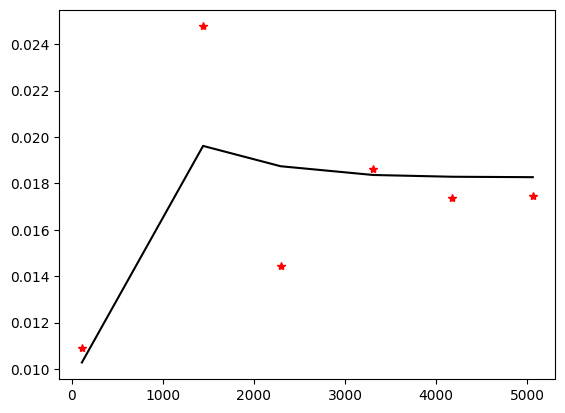

Calculating statistics on variogram model fit...


KeyboardInterrupt: 

In [3]:


ok3d_hydr = compose_krige3D("Hydrate Saturation", 0.3, 'hole-effect')

